# Library Import

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from PIL import Image
import glob
from sklearn.model_selection import train_test_split



# Image Loading

In [ ]:
import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 디렉토리 설정
data_dir = 'C:/Users/tjxod/Downloads/Garbageclassification1212-20230517T021521Z-001'

# 클래스 레이블 정의
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# 데이터와 레이블을 저장할 리스트 초기화
X = []
Y = []

# 각 클래스에 대해 반복하여 데이터와 레이블 생성
for idx, j in enumerate(labels):
    label = [0] * 6
    label[idx] = 1
    image_dir = data_dir + "/" + j
    files = glob.glob(image_dir + "/*.jpg")
    for f in files:
        img = Image.open(f) 
        img = img.convert("RGB")
        img = img.resize((64, 64))
        data = np.asarray(img)
        X.append(data)
        Y.append(label)

# 리스트를 넘파이 배열로 변환
X = np.array(X)
Y = np.array(Y)

print(len(X))

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023, shuffle=True)

In [ ]:
import numpy as np
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts = True))

(2021, 64, 64, 3)
(2021, 6)
(array([0, 1]), array([10105,  2021]))


# Rescaling & Resize

In [ ]:
# 훈련 데이터 스케일링 및 형태 변환
train_scaled = X_train / 255.0
train_scaled = train_scaled.reshape(-1, 64 * 64 * 3)
print(train_scaled.shape)

(2021, 12288)


In [ ]:
# 테스트 데이터 스케일링 및 형태 변환
test_scaled = X_test / 255.0
test_scaled = test_scaled.reshape(-1,64*64*3)

# Data Labeling

In [ ]:
Z_train =[]
for i in range(len(y_train)):
    if (y_train[i] == [1, 0, 0, 0, 0, 0]).all():
        Z_train.append(0)
    elif (y_train[i] == [0, 1, 0, 0, 0, 0]).all():
        Z_train.append(1)
    elif (y_train[i] == [0, 0, 1, 0, 0, 0]).all():
        Z_train.append(2)
    elif (y_train[i] == [0, 0, 0, 1, 0, 0]).all():
        Z_train.append(3)
    elif (y_train[i] == [0, 0, 0, 0, 1, 0]).all():
        Z_train.append(4)
    elif (y_train[i] == [0, 0, 0, 0, 0, 1]).all():
        Z_train.append(5)


In [ ]:
Z_test =[]
for i in range(len(y_test)):
    if (y_test[i] == [1, 0, 0, 0, 0, 0]).all():
        Z_test.append(0)
    elif (y_test[i] == [0, 1, 0, 0, 0, 0]).all():
        Z_test.append(1)
    elif (y_test[i] == [0, 0, 1, 0, 0, 0]).all():
        Z_test.append(2)
    elif (y_test[i] == [0, 0, 0, 1, 0, 0]).all():
        Z_test.append(3)
    elif (y_test[i] == [0, 0, 0, 0, 1, 0]).all():
        Z_test.append(4)
    elif (y_test[i] == [0, 0, 0, 0, 0, 1]).all():
        Z_test.append(5)

# Decision Tree: Train_score = 100% | Test_score = 48.8%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,Z_train)
print(dt.score(train_scaled, Z_train))
print(dt.score(test_scaled, Z_test))

0.9995051954477981
0.48221343873517786


# Ridge model:

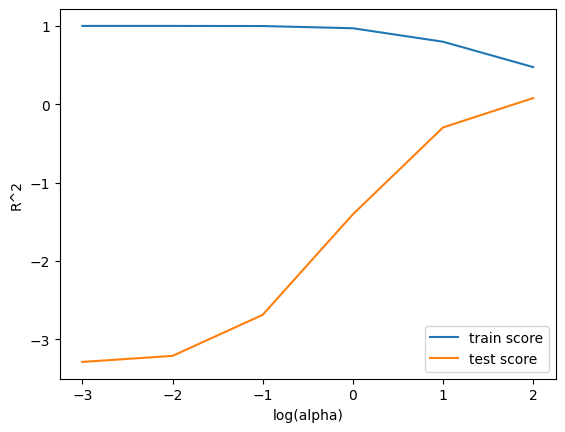

In [ ]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 2, 6)
train_score = []
test_score = []


# alpha 값은 -3부터 2까지 로그 스케일로 생성됩니다

alpha = np.logspace(-3, 2, 6)

# 각 alpha 값에 대해 훈련 점수와 테스트 점수를 저장할 리스트를 초기화합니다
train_score = []
test_score = []

# 각 alpha 값에 대해 Ridge 회귀 모델을 생성하고 학습합니다
for a in alpha:
    # 현재 alpha 값을 사용하여 Ridge 회귀 모델을 생성합니다
    ridge = Ridge(alpha=a)
    
    # 훈련 데이터에 모델을 학습시킵니다
    ridge.fit(train_scaled, Z_train)
    
    # 훈련 데이터에 대한 R^2 점수를 계산하고 train_score 리스트에 추가합니다
    train_score.append(ridge.score(train_scaled, Z_train))
    
    # 테스트 데이터에 대한 R^2 점수를 계산하고 test_score 리스트에 추가합니다
    test_score.append(ridge.score(test_scaled, Z_test))

# alpha 값에 따른 훈련 점수와 테스트 점수를 그래프로 시각화합니다
plt.plot(np.log10(alpha), train_score, label='훈련 점수')
plt.plot(np.log10(alpha), test_score, label='테스트 점수')
plt.xlabel('log(alpha)')
plt.ylabel('R^2')
plt.legend()
plt.show()

# Logistic Regression: Train_score = 100% | Test_score = 41.5%

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델을 생성합니다
# C는 규제 강도를 조절하는 매개변수로, 작을수록 강한 규제를 의미합니다
# max_iter는 최대 반복 횟수를 의미합니다
lr = LogisticRegression(C=20, max_iter=1000)

# Logistic Regression 모델을 훈련 데이터에 맞춥니다
lr.fit(train_scaled, Z_train)

# 훈련 데이터에 대한 정확도를 계산하여 출력합니다
train_accuracy = lr.score(train_scaled, Z_train)
print("훈련 데이터 정확도:", train_accuracy)
print()

# 테스트 데이터에 대한 정확도를 계산하여 출력합니다
test_accuracy = lr.score(test_scaled, Z_test)
print("테스트 데이터 정확도:", test_accuracy)
print()

# 테스트 데이터의 첫 100개 샘플에 대해 예측 결과를 출력합니다
predictions = lr.predict(test_scaled[:100])
print("예측 결과:", predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9995051954477981

0.4150197628458498
[4 4 5 1 5 1 1 4 4 2 4 1 3 0 0 5 4 0 4 2 0 3 0 3 5 4 4 2 0 4 4 3 3 3 1 0 4
 0 3 1 1 1 2 0 4 5 3 0 4 2 0 4 1 1 2 2 4 5 5 4 3 1 4 4 2 3 3 3 1 1 0 4 1 1
 3 3 3 0 1 4 3 0 4 1 3 1 4 0 3 0 2 1 2 0 3 1 0 4 4 0]


# XGBOOST: Train_score = 100% | Test_score = 69.24%

In [ ]:
import xgboost as xgb

# XGBoost 모델을 생성합니다
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # 다중 클래스 분류를 위해 'multi:softmax' objective를 선택합니다
    num_class=6,  # 클래스 개수를 지정합니다
    eta=0.1,  # 학습률을 설정합니다
    max_depth=6,  # 트리의 최대 깊이를 설정합니다
    min_child_weight=1,  # 리프 노드를 추가로 나눌 때 필요한 최소 가중치 합을 설정합니다
    subsample=0.8,  # 훈련 데이터의 샘플링 비율을 설정합니다
    colsample_bytree=0.8  # 각 트리를 구성하는 특성의 비율을 설정합니다
)

# XGBoost 모델을 훈련 데이터에 맞춥니다
xgb_model.fit(train_scaled, Z_train)

# 훈련 데이터에 대한 정확도를 계산하여 출력합니다
train_accuracy = xgb_model.score(train_scaled, Z_train)
print("훈련 데이터 정확도:", train_accuracy)

# 테스트 데이터에 대한 정확도를 계산하여 출력합니다
test_accuracy = xgb_model.score(test_scaled, Z_test)
print("테스트 데이터 정확도:", test_accuracy)

0
Training Accuracy:  1.0
Test Accuracy:  0.6924603174603174


# Random Forest: Train_score = 100% | Test_score = 68.6%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(rf, train_scaled,Z_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.6860412577311952


# SVM: Train_score = 100% | Test_score = 60%

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_scaled, Z_train)
print(svm.score(train_scaled, Z_train))
print()
print(svm.score(test_scaled, Z_test))
print(svm.predict(test_scaled[:100]))